<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Redes_Neurais_no_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://github.com/gitflai/imagens/blob/main/capa.jpg?raw=true)

# **Redes Neurais**



## **Importação dos dados**


In [195]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = (dados['charges'] - dados['charges'].mean())/dados['charges'].std() 
dados['bmi'] = (dados['bmi'] - dados['bmi'].mean())/dados['bmi'].std()  

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.453151,0,1,southwest,0.298472
1,18,male,0.509431,1,0,southeast,-0.953333
2,28,male,0.383164,3,0,southeast,-0.728402
3,33,male,-1.305043,0,0,northwest,0.719574
4,32,male,-0.292447,0,0,northwest,-0.776512


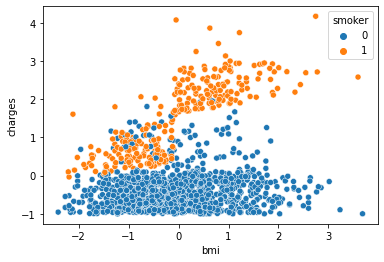

In [196]:
import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

X = dados[['bmi', 'charges']]
y = dados['smoker'] 

## **Validação Cruzada**


In [197]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kf = KFold(n_splits = 5, shuffle = True)


## **Rede Neural**


In [198]:
from sklearn.neural_network import MLPClassifier 

modelo = MLPClassifier(hidden_layer_sizes = (10), 
                       activation = 'relu', 
                       batch_size = 64, 
                       learning_rate = 'constant', 
                       learning_rate_init = 0.01, 
                       max_iter = 200, 
                       early_stopping = True, 
                       n_iter_no_change = 50,)


metricas = cross_validate(modelo, X, y, cv = kf, scoring = ['accuracy', 'recall', 'precision']) 

metricas['test_accuracy'].mean()

print('Acuracia:', metricas['test_accuracy'].mean())
print('Sensibilidade:', metricas['test_recall'].mean())
print('VPP:', metricas['test_precision'].mean())


Acuracia: 0.9371848622058249
Sensibilidade: 0.8583001282006861
VPP: 0.8352633375983404



## **Região de Decisão**


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


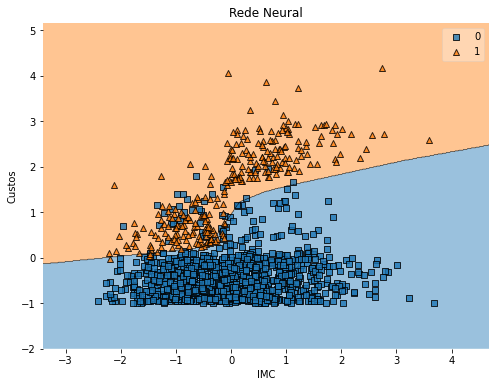

In [199]:
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Rede Neural')  
plt.show()

In [200]:
modelo.n_iter_

87

In [ ]:
modelo.loss_curve_

---

## Parte 2 - Implementando uma Rede Perceptron do zero

In [212]:
def funcaoAtivacao(x): 
    if x > 0:
        return 1
    else:
        return 0 
        
X1, X2 = X['bmi'], X['charges'] 

w0, w1, w2 = 1, 1, 1

epocas = 100
eta = 0.03

n = X.shape[0] 
pesos = []

for epoca in range(epocas):
    for i in range(n):

        #rede vai pra frente
        z = w0 + w1*X1[i] + w2*X2[i]

        #e aí, a rede errou?
        erro = y[i] - funcaoAtivacao(z)

        #retropropagação dos erros
        w0 = w0 + eta* 1 *erro
        w1 = w1 + eta*X1[i]*erro
        w2 = w2 + eta*X2[i]*erro

        #só pra deixar os outputs mais legíveis
        w0, w1, w2 = round(w0, 2), round(w1, 2), round(w2, 2)
        
        #guardando o histórico dos pesos
        pesos.append([w0, w1, w2]) 


In [209]:
len(pesos)

133800

Pesos:     [-0.11, -0.03, 0.13]

Acc Treino:     0.9126

Matriz de Confusão
       0    1
0  1019   45
1    72  202 



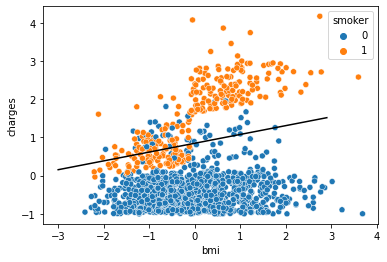

In [213]:
from sklearn.metrics import confusion_matrix

w = pesos[-1]
z = w[0] + w[1]*X1 + w[2]*X2
acc = (z.apply(funcaoAtivacao) == y).mean()
mc = confusion_matrix(y, z.apply(funcaoAtivacao))
print('Pesos:    ', w)
print('\nAcc Treino:    ', round(acc, 4))
print('\nMatriz de Confusão\n', pd.DataFrame(mc), '\n')


sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);
x = np.arange(-3, 3, 0.1)
fx = x*(-w[1]/w[2]) - w[0]/w[2]
 
plt.plot(x, fx, color = 'black')
plt.show()

## Comparando os resultados com o Perceptron do ScikitLearn

In [214]:
from sklearn.linear_model import Perceptron 

clf = Perceptron()
clf.fit(X, y)
print(confusion_matrix(y, clf.predict(X)))
print('acc:', (y == clf.predict(X)).mean())

[[1023   41]
 [  70  204]]
acc: 0.9170403587443946


## Animação da evolução dos pesos

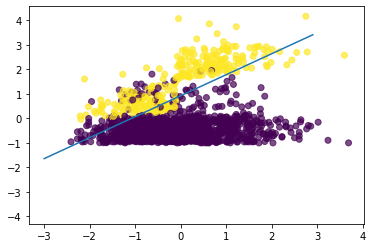

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

frames = 300
x = np.arange(-3, 3, 0.1)

w = pesos[0]
fx = x*(-w[1]/w[2]) - w[0]/w[2]
 
line, = ax.plot(x, fx)
ax.scatter(X1, X2, c = y, alpha = 0.7)

def animate(i):
    w = pesos[i*5]
    fx = x*(-w[1]/w[2]) - w[0]/w[2]
    line.set_ydata(fx)  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=50, blit=True, save_count=frames)

ani.save("movie.mp4") 

plt.show()